### Summery
<pre>
Author           : Anjana Tiha
Project Name     : Detection of Pneumonia from Chest X-Ray Images using Convolutional Neural Network, 
                   and Transfer Learning.
Description      : 1. Detected Pneumonia from Chest X-Ray images by retraining pretrained model “InceptionV3” 
                      with 5856 images of X-ray (1.15GB).
                   2. For retraining removed output layers, freezed first few layers and Fine-tuned model for 
                      two new label classes (Pneumonia and Normal).
                   3. Attained testing accuracy 83.44% and loss 0.42.
Method           : 
Tools/Library    : Python, Keras, PyTorch, TensorFlow
Version History  : 1.0.0.0
Current Version  : 1.0.0.0
Last Update      : 11.24.2018
Comments         : Please use Anaconda editor for convenience.
</pre>

#### Code
<pre>
GitHub Link      : <a href=https://github.com/anjanatiha/Detection-of-Pneumonia-from-Chest-X-Ray-Images>Detection of Pneumonia from Chest X-Ray Images(GitHub)</a>
GitLab Link      : <a href=https://gitlab.com/anjanatiha/Detection-of-Pneumonia-from-Chest-X-Ray-Images>Detection of Pneumonia from Chest X-Ray Images(GitLab)</a>
Portfolio        : <a href=https://anjanatiha.wixsite.com/website>Anjana Tiha's Portfolio</a>
</pre>

#### Dataset
<pre>
Dataset Name     : Chest X-Ray Images (Pneumonia)
Dataset Link     : <a href=https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia>Chest X-Ray Images (Pneumonia) Dataset (Kaggle)</a>
                 : <a href=https://data.mendeley.com/datasets/rscbjbr9sj/2>Chest X-Ray Images (Pneumonia) Dataset (Original Dataset)</a>
Original Paper   : <a href=https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5>Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning</a>
                   (Daniel S. Kermany, Michael Goldbaum, Wenjia Cai, M. Anthony Lewis, Huimin Xia, Kang Zhang)
                   https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5
</pre>

#### Library/Tools Version
- Python - v3.6.7
- argparse
- random
- numpy
- shutil
- gc
- re
- Keras - 2.2.4
- Keras-preprocessing - v1.0.5
- TensorFlow - 1.12
- PIL/Pillow - 5.1.0
- Matplotlib - 2.2.2
- scikit-learn - 0.19.1
- mlxtend - 0.14.0

#### Commands / Running Instruction
<pre>
tensorboard --logdir=logs
%config IPCompleter.greedy=True
</pre>

<pre>
<b>Dataset Details</b>
Dataset Name            : Chest X-Ray Images (Pneumonia)
Number of Class         : 2
Number/Size of Images   : Total      : 5856 (1.15 Gigabyte (GB))
                          Training   : 5216 (1.07 Gigabyte (GB))
                          Validation : 320  (42.8 Megabyte (MB))
                          Testing    : 320  (35.4 Megabyte (MB))

<b>Model Parameters</b>
Machine Learning Library: Keras
Base Model              : InceptionV3
Optimizers              : Adam
Loss Function           : categorical_crossentropy

<b>Training Parameters</b>
Batch Size              : 64
Number of Epochs        : 50
Training Time           : 3 Hours

<b>Output (Prediction/ Recognition / Classification Metrics)</b>
<!--<b>Validation</b>-->
<b>Testing</b>
Accuracy                : 83.44%
Loss                    : 0.42
<!--Precision               : -->
Recall                  : 94% (highest)
<!--Specificity             : -->
</pre>

### Import Libraries

In [1]:
from __future__ import print_function

import argparse
import sys
import os

import random

import time
import datetime

import numpy as np

import shutil
import inspect

import gc

import re

import keras
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras import optimizers

from keras import backend as K

import tensorflow as tf

from IPython.display import display
from PIL import Image

import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix



C:\Users\Andromeda\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
try:
    del model
except:
    pass
tf.reset_default_graph()
K.clear_session()
gc.collect()

11

### Functions:
<pre>
Resetting model and log directory
class name cleansing
</pre>

In [3]:
import os
import shutil

# Make or reset directory
def mk_reset_dir(directory, remove=False):
    if remove and os.path.exists(directory):
        try:
            shutil.rmtree(directory)
            os.mkdir(directory)
        except:
            print("Could not remove directory : ", directory)
            return False
    else:
        try:
            os.mkdir(directory)
        except:
            print("Could not create directory: ", directory)
            return False
        
    return True

def date_time(x):
    if x==1:
        print('Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now()))
    if x==2:    
        print('Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now()))
    if x==3:  
        print('Date now: %s' % datetime.datetime.now())
    if x==4:  
        print('Date today: %s' % datetime.date.today())
        
def debug(x):
    print("-"*40, x, "-"*40)    

# Remove everything except alphabetical and selected characters from name string
def name_correct(name):
    return re.sub(r'[^a-zA-Z,:]', ' ', name).title()

In [4]:
import seaborn as sns

def count_bar(master_directory):
    dir_list = os.listdir(master_directory)
    num_class = len(dir_list)

    dir_name = []
    dir_file_count = []

    for directory in dir_list:
        cur_dir = os.path.join(master_directory, directory)
        count_sample = len(os.listdir(cur_dir))
        dir_name.append(directory)
        dir_file_count.append(count_sample)
    
    return dir_name, dir_file_count
               

def bar_plot(x, y, title, xlabel, ylabel, title_fontsize = 14, label_fontsize=12):
    plt.figure(figsize=(10,8))
    sns.barplot(x=x, y= y)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(range(len(x)), x)
    plt.show()

In [5]:
from collections import Counter

def get_class_weights(y):
    counter = Counter(y)                          
    max_val = float(max(counter.values()))     
    class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}   
    return class_weights

### Setting Input/ Output Directory
<pre>
Data             : training, validation, testing
Model and output : model directory and logs directory
</pre>

In [6]:
# Configure input/ output directory
# Configure training, validation, testing directory

input_directory = r"data/input/"
output_directory = r"data/output/"

training_dir = input_directory+ r"train"
testing_dir = input_directory+ r"test"
validation_dir = input_directory+ r"val"

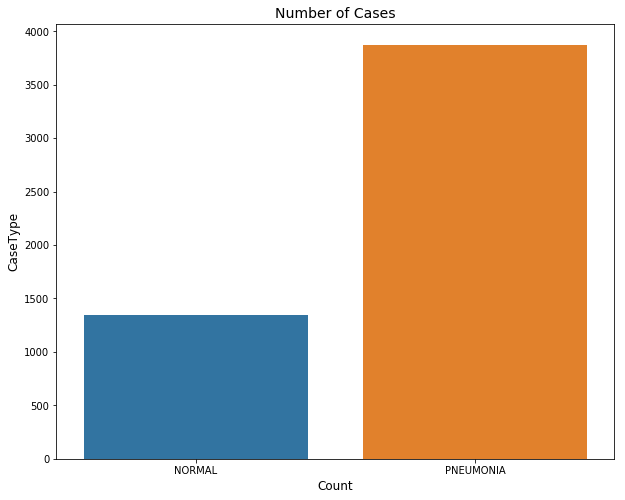

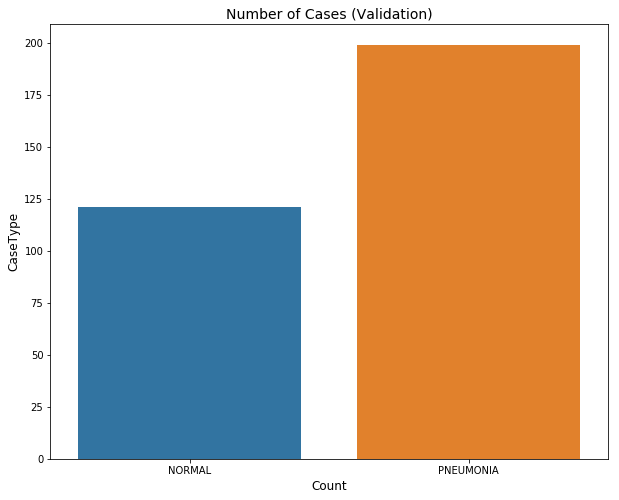

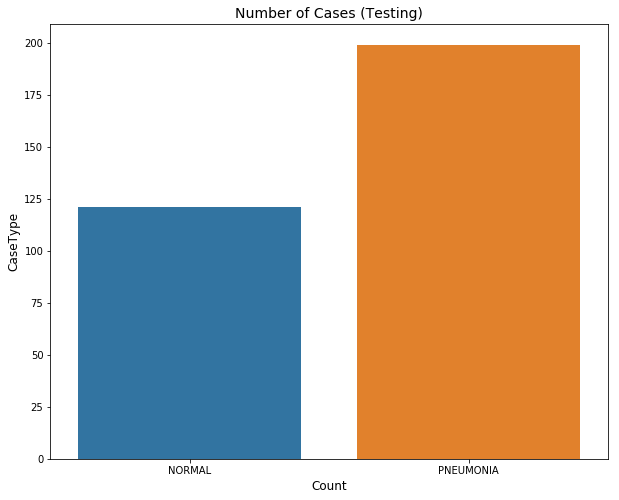

In [7]:
xlabel="Count"
ylabel="CaseType"
title_fontsize=14
label_fontsize=12

master_directory = training_dir
dir_name, dir_file_count = count_bar(master_directory)
x=dir_name
y=dir_file_count
title="Number of Cases"
bar_plot(x, y, title, xlabel, ylabel, title_fontsize, label_fontsize)


master_directory = validation_dir
dir_name, dir_file_count = count_bar(master_directory)
x=dir_name
y=dir_file_count
title="Number of Cases (Validation)"
bar_plot(x, y, title, xlabel, ylabel, title_fontsize, label_fontsize)

master_directory = testing_dir
dir_name, dir_file_count = count_bar(master_directory)
x=dir_name
y=dir_file_count
title="Number of Cases (Testing)"
bar_plot(x, y, title, xlabel, ylabel, title_fontsize, label_fontsize)

### Preprocessing (Image Preprocessing)
#### Setting up Parameters for Image Transformation of Training, Validation, Testing and  Dataset 

In [8]:
# Get number of label/ class / category
num_class = len(os.listdir(training_dir))
print(num_class)

# Configure image preprocessing parameters for generating batches of tensor image data from train, test, validation datasets
# with real-time data augmentation. The data will be looped over (in batches).
norm = 255.0
rescale=1./norm
shear_range=0.2
zoom_range=0.2
horizontal_flip=True

# Image dimention and Batch size 
target_size=(224, 224)
batch_size=32
# batch_size=64

test_batch_size=1

# Data label class
class_mode='categorical'
# class_mode='binary'
# class_mode='sparse'

# classes = ['Cancer', 'Normal']
classes = ['Normal', 'PNEUMONIA']

# iaa.Multiply((1.2, 1.5))]) #random brightness

2


### Preprocessing (Image Preprocessing)
#### Transformation Image Dataset for Training, Validation, Testing

In [9]:
# Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches)
# Generate batches of tensor image data with real-time data augmentation from training dataset
train_datagen = ImageDataGenerator(
        rescale=rescale,
        shear_range=shear_range,
        zoom_range=zoom_range,
        horizontal_flip=horizontal_flip)

train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size=target_size,
        classes = classes,
        class_mode=class_mode,
        batch_size=batch_size)

# Generate batches of tensor image data with real-time data augmentation from validation dataset
validation_datagen = ImageDataGenerator(rescale=rescale)
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=target_size,
        classes = classes,
        class_mode=class_mode,
        batch_size=batch_size)

# Generate batches of tensor image data with real-time data augmentation from testing dataset
test_datagen = ImageDataGenerator(rescale=rescale)
test_generator = test_datagen.flow_from_directory(
        testing_dir,
        target_size=target_size,
        classes = classes,
        class_mode=class_mode,
#         batch_size=batch_size,
        batch_size=test_batch_size,
        shuffle=False) ## false added

Found 5216 images belonging to 2 classes.
Found 320 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [10]:
y=train_generator.classes
class_weight=get_class_weights(y)
class_weight

{0: 2.889634601043997, 1: 1.0}

## Training
### Load and Configure Model Function InceptionV3 for Fine-Tuning with New Class Labels
<p>1. Imports Pretrained model InceptionV3 <br>
   2. Disabled training on first few layers <br>
   3. Enabled training on top and output layers<br>
   4. Adjust output Dense Layer to number of Image Classes <br>
</p>

In [11]:
# Load and Configure Model Function InceptionV3 for Fine-Tuning with New Class Labels
def get_inception_model(train_generator, validation_generator, epochs, verbose, sgd, loss, metrics, tensorboard, callbacks, num_class, include_top=False, non_trainable_index=249, print_layers = False):    
    # create the base pre-trained model
    base_model = InceptionV3(weights='imagenet', include_top=include_top)

    # add a global spatial average pooling layer
    # Setting model layers specially output layer with class number
    x = base_model.output
    
    x = GlobalAveragePooling2D()(x)
    
    # let's add a fully-connected layer
    x = Dense(1024, activation='relu')(x)
    
    # and a logistic layer -- let's say we have 2 classes

    # softmax for multi-class
    predictions = Dense(num_class, activation='softmax')(x) 
    
    # sigmoid for 2 class or binary class
    # predictions = Dense(num_class, activation='sigmoid')(x) 

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)
    
    

    
    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    for layer in base_model.layers:
        layer.trainable = False
     
    # compile model with loss, optimizer and metrics 
    model.compile(sgd, loss=loss, metrics=metrics)
    
    if callbacks:
        tensorboard.set_model(model) 
    
    # train the model on the new data for a few epochs
    model.fit_generator(train_generator,
                        steps_per_epoch = len(train_generator),
                        epochs=epochs,
                        # verbose=verbose, 
                        callbacks=callbacks,
                        validation_data=validation_generator,
                        validation_steps=len(validation_generator),
                        class_weight = class_weight)

    # at this point, the top layers are well trained and we can start fine-tuning
    # convolutional layers from inception V3. We will freeze the bottom N layers
    # and train the remaining top layers.

    # let's visualize layer names and layer indices to see how many layers
    # we should freeze:
    if print_layers:
        for i, layer in enumerate(base_model.layers):
            print(i, layer.name)

    # Freeze or set first few layers as untrainable
    # Unfreeze or set rest of the layers as trainable
    for layer in model.layers[:non_trainable_index]:
        layer.trainable = False
    for layer in model.layers[non_trainable_index:]:
        layer.trainable = True
        
    model.summary()
        
    return model


## Training
### Base Model Import and Initial Training
##### Base Model - InceptionV3 (pretrained) import and initial training settings

In [12]:
# inception base top layer discarded
include_top = False

# number of layers freezed
non_trainable_index = 249

print_layers=False

init_epochs=1
# initial_epochs=3
# initial_epochs=5
init_verbose = 0
init_callbacks = None


## Training
### Main Model Import and Parameter Setting For Main Training
#### Configuration of Loss, Optimizer and Performance Metrics

In [13]:
# set optimizer
# sgd = optimizers.Adam()
# sgd = optimizers.Adam(lr=0.001)

## works best
sgd = optimizers.Adam(lr=0.0001)
# sgd = optimizers.Adam(lr=0.0001, decay=1e-5)

# sgd = optimizers.SGD()
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# sgd = optimizer=SGD(lr=0.0001, momentum=0.9)

# set loss function
loss='categorical_crossentropy'
# loss='binary_crossentropy'

# set performance metrics
metrics=['accuracy']
# metrics=['accuracy', 'binary_accuracy', precision, recall]


## Training
### Main Model Import and Parameter Setting For Main Training
#### Configuration

In [14]:
# epochs = 50
epochs = 20

steps_per_epoch=len(train_generator)
verbose = 0
validation_steps=len(validation_generator)

## Training
### Main Model Import and Parameter Setting For Main Training
#### Configuration for Callbacks - CheckPoint, ReduceLROnPlateau, Early Stopping, TensorBoard

In [15]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

# setting model and log output directory
model_dir =  output_directory + r"models/"
# log_dir = output_directory + r"logs"
log_dir=output_directory + r"logs/{}".format(time())

# make or reset directory
# mk_reset_dir(model_dir, False)
# mk_reset_dir(log_dir, False)

model_file = model_dir+"{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5"

# checkpoint
ck_monitor='val_acc'
ck_verbose=0
ck_save_best_only=False
ck_save_weights_only=False
ck_mode='auto'
ck_period=1

# ReduceLROnPlateau
red_lr_monitor='val_loss'
red_lr_factor=0.1 # default
# red_lr_patience=5
red_lr_patience=2
red_lr_verbose=1
red_lr_mode='auto'
red_lr_min_delta=0.0001
red_lr_cooldown=0
# red_lr_min_lr=0.0001 # default
red_lr_min_lr=0.00001


# early_stopping
es_monitor = 'val_loss'
es_min_delta=0
# es_patience=0
es_patience=5
es_verbose=0
es_mode='auto'
es_baseline=None

# tensorboard
tb_histogram_freq=0
tb_batch_size=batch_size
tb_write_graph=True
tb_write_grads=False
tb_write_images=False
tb_embeddings_freq=0
tb_embeddings_layer_names=None
tb_embeddings_metadata=None
tb_embeddings_data=None


## Training
### Main Model Import and Parameter Setting For Main Training
#### Setup Callbacks - CheckPoint, ReduceLROnPlateau, Early Stopping, TensorBoard

In [16]:
checkpoint = ModelCheckpoint(model_file, monitor=ck_monitor, verbose=ck_verbose, save_best_only=ck_save_best_only, save_weights_only=ck_save_weights_only, mode=ck_mode, period=ck_period)

reduce_lr = ReduceLROnPlateau(monitor=red_lr_monitor, factor=red_lr_factor, patience=red_lr_patience, verbose=red_lr_verbose, mode=red_lr_mode, min_delta=red_lr_min_delta, cooldown=red_lr_cooldown, min_lr=red_lr_min_lr)

early_stopping = EarlyStopping(monitor=es_monitor, min_delta=es_min_delta, patience=es_patience, verbose=es_verbose, mode=es_mode, baseline=es_baseline)

tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=tb_histogram_freq, batch_size=tb_batch_size, write_graph=tb_write_graph, write_grads=tb_write_grads, write_images=tb_write_images, embeddings_freq=tb_embeddings_freq, embeddings_layer_names=tb_embeddings_layer_names, embeddings_metadata=tb_embeddings_metadata, embeddings_data=tb_embeddings_data)

In [17]:
callbacks = [checkpoint, reduce_lr, tensorboard]
# callbacks = [checkpoint, reduce_lr, early_stopping, tensorboard]

## Training
### Main Model Import and Parameter Compilation For Main Training
### Model Import and compiling with loss, optimizer and performance metrics

In [18]:
# # get inception model
# model = get_inception_model(train_generator, validation_generator, init_epochs, init_verbose, sgd, loss, metrics, tensorboard, init_callbacks, num_class, include_top, non_trainable_index, print_layers)

Epoch 1/1
163/163 [==============================] - 159s 975ms/step - loss: 0.5522 - acc: 0.8286 - val_loss: 0.5551 - val_acc: 0.7594
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_no

C:\Users\Andromeda\Anaconda3\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


## Training
### Main Model Training
#### Starts training with given parameters

In [19]:
# # train inception model
# # fine-tuning the top layers
# # compile model with loss, optimizer and metrics 
# model.compile(sgd, loss=loss, metrics=metrics)
# tensorboard.set_model(model) 

# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch = steps_per_epoch,
#     epochs=epochs,
# #     verbose=verbose,
#     callbacks=callbacks,
#     validation_data=validation_generator,
#     validation_steps=validation_steps,
#     class_weight=class_weight)
 

Epoch 1/20
163/163 [==============================] - 168s 1s/step - loss: 0.3146 - acc: 0.9183 - val_loss: 1.6825 - val_acc: 0.7312
Epoch 2/20
163/163 [==============================] - 152s 934ms/step - loss: 0.1868 - acc: 0.9502 - val_loss: 2.5892 - val_acc: 0.6344
Epoch 3/20
163/163 [==============================] - 137s 840ms/step - loss: 0.1496 - acc: 0.9555 - val_loss: 1.0939 - val_acc: 0.7188
Epoch 4/20
163/163 [==============================] - 131s 805ms/step - loss: 0.1490 - acc: 0.9595 - val_loss: 1.4468 - val_acc: 0.7000
Epoch 5/20
163/163 [==============================] - 130s 799ms/step - loss: 0.1333 - acc: 0.9651 - val_loss: 2.2743 - val_acc: 0.6406

Epoch 00005: ReduceLROnPlateau reducing learning rate to 1e-05.
Epoch 6/20
163/163 [==============================] - 134s 825ms/step - loss: 0.1078 - acc: 0.9666 - val_loss: 1.8118 - val_acc: 0.6531
Epoch 7/20
163/163 [==============================] - 129s 790ms/step - loss: 0.1022 - acc: 0.9739 - val_loss: 1.6911 - va

## Training
### Main Model Import and Validation Performance Visualization
#### Plotting Training and Validation Performance over the Epochs

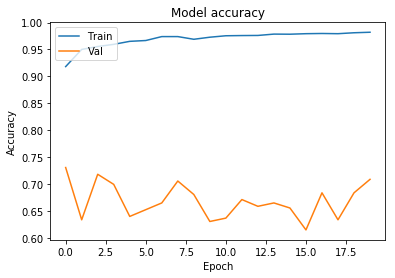

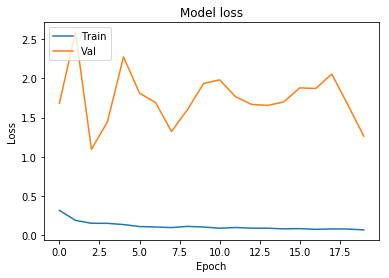

In [20]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
plot_history(history)

In [ ]:
# set optimizer
# sgd = optimizers.Adam()
# sgd = optimizers.Adam(lr=0.001)

## works best
sgd = optimizers.Adam(lr=0.0001)
# sgd = optimizers.Adam(lr=0.0001, decay=1e-5)

# sgd = optimizers.SGD()
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# sgd = optimizer=SGD(lr=0.0001, momentum=0.9)

# set loss function
loss='categorical_crossentropy'
# loss='binary_crossentropy'

# set performance metrics
metrics=['accuracy']
# metrics=['accuracy', 'binary_accuracy', precision, recall]


# epochs = 50
epochs = 20

steps_per_epoch=len(train_generator)
verbose = 0
validation_steps=len(validation_generator)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

# setting model and log output directory
model_dir =  output_directory + r"models/"
# log_dir = output_directory + r"logs"
log_dir=output_directory + r"logs/{}".format(time())

# make or reset directory
# mk_reset_dir(model_dir, False)
# mk_reset_dir(log_dir, False)

model_file = model_dir+"{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5"

# checkpoint
ck_monitor='val_acc'
ck_verbose=0
ck_save_best_only=False
ck_save_weights_only=False
ck_mode='auto'
ck_period=1

# ReduceLROnPlateau
red_lr_monitor='val_loss'
red_lr_factor=0.1 # default
# red_lr_patience=5
red_lr_patience=2
red_lr_verbose=1
red_lr_mode='auto'
red_lr_min_delta=0.0001
red_lr_cooldown=0
# red_lr_min_lr=0.0001 # default
red_lr_min_lr=0.00001


# early_stopping
es_monitor = 'val_loss'
es_min_delta=0
# es_patience=0
es_patience=5
es_verbose=0
es_mode='auto'
es_baseline=None

# tensorboard
tb_histogram_freq=0
tb_batch_size=batch_size
tb_write_graph=True
tb_write_grads=False
tb_write_images=False
tb_embeddings_freq=0
tb_embeddings_layer_names=None
tb_embeddings_metadata=None
tb_embeddings_data=None


In [ ]:
checkpoint = ModelCheckpoint(model_file, monitor=ck_monitor, verbose=ck_verbose, save_best_only=ck_save_best_only, save_weights_only=ck_save_weights_only, mode=ck_mode, period=ck_period)

reduce_lr = ReduceLROnPlateau(monitor=red_lr_monitor, factor=red_lr_factor, patience=red_lr_patience, verbose=red_lr_verbose, mode=red_lr_mode, min_delta=red_lr_min_delta, cooldown=red_lr_cooldown, min_lr=red_lr_min_lr)

early_stopping = EarlyStopping(monitor=es_monitor, min_delta=es_min_delta, patience=es_patience, verbose=es_verbose, mode=es_mode, baseline=es_baseline)

tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=tb_histogram_freq, batch_size=tb_batch_size, write_graph=tb_write_graph, write_grads=tb_write_grads, write_images=tb_write_images, embeddings_freq=tb_embeddings_freq, embeddings_layer_names=tb_embeddings_layer_names, embeddings_metadata=tb_embeddings_metadata, embeddings_data=tb_embeddings_data)

In [ ]:
callbacks = [checkpoint, reduce_lr, tensorboard]
# callbacks = [checkpoint, reduce_lr, early_stopping, tensorboard]

### Retraining 
#### Retraining Best Model
###### Selecting Best Model File and Parameters for Retraining

In [ ]:
# selecting best model file / checkpoint for retraining
model_path = model_dir+r"12-val_acc-0.70-val_loss-1.09.hdf5"
model_path = model_dir+r"20-val_acc-0.66-val_loss-1.97.hdf5"

In [ ]:
model = keras.models.load_model(model_path)

In [ ]:
# train inception model
# fine-tuning the top layers
# compile model with loss, optimizer and metrics 
model.compile(sgd, loss=loss, metrics=metrics)
tensorboard.set_model(model) 

# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch = steps_per_epoch,
#     epochs=epochs,
# #     verbose=verbose,
#     callbacks=callbacks,
#     validation_data=validation_generator,
#     validation_steps=validation_steps,
#     class_weight=class_weight)
 

### Retraining 
#### Retraining Best Model
###### Loading Best Model for Retraining

### Retraining 
#### Retraining Best Model
#### Configuration for Retraining

In [ ]:
# batch_size=32
# # batch_size=64
# class_mode='categorical'
# # class_mode='binary'

# loss='categorical_crossentropy'
# # loss='binary_crossentropy'

# # metrics=['accuracy', 'binary_accuracy', precision, recall]
# metrics=['accuracy']

epochs = 50
verbose = 1

##### Retrain the selected best model

In [ ]:
# retrain by loading last good model
history = model.fit_generator(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs=epochs,
    verbose=1,
    callbacks=callbacks_list,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    class_weight=class_weight)

### Performance Metrics Function

In [ ]:
def reverse_pos_neg(CM, print_bool):
    tp=CM[0][0]
    fp=CM[0][1]
    fn=CM[1][0]
    tn=CM[1][1]
    if print_bool:
        print(tp, fp, tn, fn, tn)
    return [tp, fp, tn, fn, tn]


def report(CM, reverse):
    if not reverse:
        tn, fp, fn, tp = CM.ravel()

    else:
        tp=CM[0][0]
        fp=CM[0][1]
        fn=CM[1][0]
        tn=CM[1][1]
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print("Recall of the model is {:.2f}".format(recall))
    print("Precision of the model is {:.2f}".format(precision))
    
    return precision, recall

# Start Here!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Testing
#### Testing all saved models
##### Testing all models saved on each epochs to search for the best model based on test dataset image recognition performance

In [ ]:
# testing model

details = False
best_accuracy = 0
best_loss = 0

lowest_accuracy = 100
lowest_loss = 1000000

models_path = "data\\output\\models\\"

best_model_acc = ""
best_model_loss = ""

models_arr = []
accuracy_arr = []
loss_arr = []

model_files = os.listdir(models_path)

i=0
for model_file in model_files:
    model_path = models_path+"\\"+model_file
    try:
        del model
    except:
        pass
    tf.reset_default_graph()
    K.clear_session()
    gc.collect()
    
    model = keras.models.load_model(model_path)
    
    result = model.evaluate_generator(generator=test_generator, steps=len(test_generator))
    
    accuracy = result[1]*100
    loss = result[0]
    
    accuracy_arr.append(accuracy)
    loss_arr.append(loss)
    models_arr.append(model_path)
    
    if accuracy>best_accuracy:
        best_accuracy = accuracy
        best_loss = loss
        best_model_acc=model_path
        
    if loss<lowest_loss:
        lowest_accuracy = accuracy
        lowest_loss = loss
        best_model_loss=model_path
        
    if details:
        print("%s%s"%("Model No: ", i))
        print("%s%s"%("Model File Path: ", model_file))
        print("*"*80)
        print("%s%.2f%s"% ("Current Accuracy: ", accuracy, "%"))
        print("%s%.2f"% ("Current Loss: ", loss))

        print("-"*80)
        print("-"*80)
        
        print("%s%.2f%s"% ("Best Test Accuracy (Accuracy wise):", best_accuracy, "%"))
        print("%s%.2f"% ("Best Test Loss (Accuracy wise): ", best_loss))

        print("-"*80)

        print("%s%.2f%s"% ("Best Test Accuracy (Loss wise): ", lowest_accuracy, "%"))
        print("%s%.2f"% ("Best Test Loss (Loss wise): ", lowest_loss))

    elif i%10==0:
        print("%s%s"%("Model No: ", i))
        print("%s%s"%("Model File Path: ", model_file))
        print("*"*80)
        
        print("%s%.2f%s"% ("Best Test Accuracy: ", best_accuracy, "%"))
        print("%s%.2f"% ("Best Test Loss: ", best_loss))

        print("-"*80)

        print("%s%.2f%s"% ("Best Test Accuracy (Loss wise): ", lowest_accuracy, "%"))
        print("%s%.2f"% ("Best Test Loss (Loss wise): ", lowest_loss))
    
    i+=1

In [ ]:
# testing model  2

target_names = ['Cancer', 'Normal']
CM_list = []
    
details = True
best_accuracy = 0
best_loss = 0

lowest_accuracy = 100
lowest_loss = 1000000

models_path = "data\\output\\models\\"

best_model_acc = ""
best_model_loss = ""

models_arr = []
accuracy_arr = []
loss_arr = []

model_files = os.listdir(models_path)

i=0

for model_file in model_files:
    model_path = models_path+"\\"+model_file
    try:
        del model
    except:
        pass
    tf.reset_default_graph()
    K.clear_session()
    gc.collect()
    
    model = keras.models.load_model(model_path)

    preds = model.predict_generator(test_generator, steps=len(test_generator))
    y_classes = preds.argmax(axis=-1)

    CM = confusion_matrix(test_generator.classes, y_classes)
    CM_report = classification_report(test_generator.classes, y_classes, target_names=target_names)
    
    models_arr.append(model_path)
    CM_list.append({model_file: CM})
        
    if details:
        print("%s%s"%("Model No: ", i))
        print("%s%s"%("Model File Path: ", model_file))
        print("*"*80)
        print(CM_report)

        print("-"*80)
        print("-"*80)

    elif i%10==0:
        print("%s%s"%("Model No: ", i))
        print("%s%s"%("Model File Path: ", model_file))
        print("*"*80)
        print(CM_report)

        print("-"*80)
        print("-"*80)
    
    i+=1

##### Printing best model accuracy and loss

In [ ]:
print("-"*17,"Summary of Model Performance on Test Dataset", "-"*17)

print("%s%s"% ("Best Model Path (Accuracy): ", best_model_acc))
print("%s%.2f%s"% ("Best Test Accuracy: ", best_accuracy, "%"))
print("%s%.2f"% ("Best Test Loss: ", best_loss))

print("-"*100)
print("-"*100)

print("%s%s"% ("Best Model Path (Loss): ", best_model_loss))
print("%s%.2f%s"% ("Best Test Accuracy: ", lowest_accuracy, "%"))
print("%s%.2f"% ("Best Test Loss: ", lowest_loss))

#### Plotting all model performance over all epochs and models for accuracy and loss

In [ ]:
x_axis_arr = np.arange(len(accuracy_arr))
plt.title("Test Dataset Performance (Accuracy)")
plt.plot(x_axis_arr, accuracy_arr)
plt.xlabel("Iteration Number")
plt.ylabel("Accuracy (100%)")
plt.show()

x_axis_arr = np.arange(len(loss_arr))
plt.title("Test Dataset Performance (Loss)")
plt.plot(x_axis_arr, loss_arr)
plt.xlabel("Iteration Number")
plt.ylabel("Loss")
plt.show()

##### Selecting Best Model for full evaluation (for accuracy/f1 score or recall)

In [ ]:
# best accuracy/ F-1 score
# model_path = "data/output/models/"+"17-val_acc-0.82-val_loss-0.42.hdf5"

# Lowest validation Loss
# model_path = "data/output/models/"+"12-val_acc-0.70-val_loss-1.09.hdf5"

# Best Recall
model_path = "data/output/models/"+"20-val_acc-0.66-val_loss-1.97.hdf5"

##### Evaluate Best Model for Test Dataset

In [ ]:
# testing model
model = keras.models.load_model(model_path)
result = model.evaluate_generator(generator=test_generator, steps=len(test_generator), verbose=1)
print("-"*17,"Summary of Best Model Performance on Test Dataset", "-"*17)
print("%s%.2f%s"% ("Test Accuracy: ", result[1]*100, "%"))
print("%s%.2f"% ("Test Loss: ", result[0]))


##### Selecting Best Model for further analysis, evaluation and visualization

In [ ]:
# testing model
model = keras.models.load_model(model_path)
preds = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)
y_classes = preds.argmax(axis=-1)

In [ ]:
from sklearn.metrics import roc_auc_score

def extract_id(x):
    
    # split into a list
    a = x.split('/')
    # split into a list
    b = a[1].split('.')
    extracted_id = b[0]
    
    return extracted_id



test_filenames = test_generator.filenames
df_preds = pd.DataFrame(predictions, columns=classes)
df_preds['file_names'] = test_filenames
df_preds['id'] = df_preds['file_names'].apply(extract_id)
df_preds.head()

# Get the true labels
y_true = test_generator.classes

# Get the predicted labels as probabilities
y_pred = df_preds['Cancer']

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_gen.classes, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

roc_auc_score(y_true, y_pred)


In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
submission = pd.DataFrame({'id':image_id, 
                           'label':y_pred, 
                          }).set_index('id')

submission.to_csv('patch_preds.csv', columns=['label']) 
submission.head()

##### Showing Confusion Matrix of Model Performance for Test Dataset

In [ ]:
target_names = ['Cancer', 'Normal']

CM = confusion_matrix(test_generator.classes, y_classes)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), target_names, fontsize=16)
plt.yticks(range(2), target_names, fontsize=16)
plt.show()

##### Showing precision, recall, f1-score, support for Model Performance over Test Dataset

In [ ]:
classification_report_print = classification_report(test_generator.classes, y_classes, target_names=target_names)
print(classification_report_print)

##### Showing calcualted precision, recall for Model over Test Dataset

In [ ]:
# Calculate Precision and Recall
tn, fp, fn, tp = CM.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))


##### Retriving actual labels 

In [ ]:
label_map = (test_generator.class_indices)
label_map_rev = {v: name_correct(k) for k,v in label_map.items()}
num_batch_t = len(test_generator)
print(label_map)
print(label_map_rev)

##### Showing accuracy for Model over Single Batch of Test Dataset

In [ ]:
num = random.randint(0, num_batch_t-1)
y_img_batch, y_class_batch = test_generator[num] 
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print("Selected Batch No: %d\nBatch Size: %d"%(num, len(y_pred)))
print("Accuracy : ", sum(y_pred==y_true)/batch_size*100, "%")

y_true_labels = [label_map_rev[c] for c in y_true]
y_pred_labels = [label_map_rev[c] for c in y_pred]
batch_size_t = len(y_true_labels)

### Visualization 
Visualization of performance of a random test dataset batch and few random images from a batch

#### Visualization 1 (Random Batch)
Visualization of performance of a random test dataset batch

Setting parameters for visualization 1

In [ ]:
figure_directory = "data/output/figures"
image_file_name = figure_directory+"/result"

dpi=100

update_image = True


cols = 8
rows= batch_size_t/cols
if batch_size_t%cols==0:
    rows = int(batch_size_t/cols)
else:
    rows = int(batch_size_t/cols)+1
    
figsize_col = cols*2.5
figsize_row = rows*2.5

hspace = 0.5
wspace = 0.3

facecolor='w'
edgecolor='k'

titlesize = 'small'

true_prediction_label_color='black'
false_prediction_label_color='red'

true_label_title_prefix = "org : "
pred_label_title_prefix = "pred: "

if not os.path.exists(figure_directory):
    os.mkdir(figure_directory)

#### Visualization 1 (Random Batch)
Visualization of performance of a random test dataset batch

In [ ]:
# figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(figsize_col, figsize_row),
                        dpi=dpi, facecolor=facecolor, edgecolor=edgecolor,
                        subplot_kw={'xticks': [], 'yticks': []})


plt.rcParams.update({'axes.titlesize': titlesize})
plt.subplots_adjust(hspace=hspace, wspace=wspace)

for i in range(0, batch_size_t): # how many imgs will show from the mxn grid
    plt.subplot(rows, cols, i+1)
    
    plt.imshow(y_img_batch[i])
    
    plt.xticks([])
    plt.yticks([])
    
    if y_true_labels[i]==y_pred_labels[i]:
        plt.title(true_label_title_prefix + y_true_labels[i] + "\n" + pred_label_title_prefix + y_pred_labels[i])
    else:
        plt.title(true_label_title_prefix + y_true_labels[i] + "\n" + pred_label_title_prefix + y_pred_labels[i], color=false_prediction_label_color)
        
    if update_image and os.path.exists(image_file_name):
        os.remove(image_file_name)
    
    fig.savefig(image_file_name, dpi=dpi)

plt.tight_layout()
plt.show()

#### Visualization 2 (Random) 
Visualization of performance of a few random images from a random batch

Setting parameters for visualization 2

In [ ]:
figure_directory = "data/output/figures"
image_file_name = figure_directory+"/sample"

dpi=100

update_image = True

cols = 4
rows= 2

count = rows*cols
    
figsize_col = cols*2.5
figsize_row = rows*2.5

hspace = 0.5
wspace = 0.3

# titlesize = 'small'

true_prediction_label_color='black'
false_prediction_label_color='red'

true_label_title_prefix = "org:  "
pred_label_title_prefix = "pred: "

#### Visualization 2 (Random) 
Visualization of performance of a few random images from a random batch

In [ ]:
# figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(figsize_col, figsize_row),
                        dpi=dpi, facecolor=facecolor, edgecolor=edgecolor,
                        subplot_kw={'xticks': [], 'yticks': []})

plt.rcParams.update({'axes.titlesize': titlesize})
plt.subplots_adjust(hspace=hspace, wspace=wspace)


batch_size_tmp = batch_size_t

m = {}

for i in range(0, count): 
    num = random.randint(0, batch_size_tmp-1)
    while num in m:
        num = random.randint(0, batch_size_tmp-1)
    
    m[num]=1
    
    plt.subplot(rows, cols, i+1)
    
    plt.imshow(y_img_batch[num])
    
    plt.xticks([])
    plt.yticks([])
    
    if y_true_labels[num]==y_pred_labels[num]:
        plt.title(true_label_title_prefix + y_true_labels[num] + "\n" + pred_label_title_prefix + y_pred_labels[num])
    else:
        plt.title(true_label_title_prefix + y_true_labels[num] + "\n" + pred_label_title_prefix + y_pred_labels[num], color=false_prediction_label_color)
    
   
    if update_image and os.path.exists(image_file_name):
        os.remove(image_file_name)   
    
    fig.savefig(image_file_name, dpi=dpi)


plt.tight_layout()
plt.show()